### Ragone plot

In this notebook we create Ragone plots. Thereby we can identify dynamic limitations, that have not been considered within the calculations from the OCP curves.
* We will see different input options and calculations for the Ragone plot.
* We can see reaction and transport limitations by adjusting particle sizes and tortuosities
* We compare theoretical with simulated estimations for different thicknesses and porosities

In [1]:
# %pip install "pybamm[plot,cite]" -q    # install PyBaMM if it is not installed
# !pip install git+https://github.com/pybamm-team/pybamm-tea.git # install PyBaMM-TEA if it is not installed
import pybamm
import pybamm_tea
import numpy as np
import matplotlib.pyplot as plt

At first we create a TEA class from an _base_ parameter set, having all necessary parameters for the desired model, and an input set that can add/update parameters.

In [2]:
# set up the TEA class
input = {"Electrolyte density [kg.m-3]": 1276}
base = pybamm.ParameterValues("Chen2020")
tea_class = pybamm_tea.TEA(base, input)

C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:215: UserWarning: 'Negative electrode active material density [kg.m-3]' and 'Negative electrode dry density [kg.m-3]' have been calculated from; 'Electrolyte density [kg.m-3]', 'Negative electrode porosity' and 'Negative electrode density [kg.m-3]'
  warnings.warn(
C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:215: UserWarning: 'Positive electrode active material density [kg.m-3]' and 'Positive electrode dry density [kg.m-3]' have been calculated from; 'Electrolyte density [kg.m-3]', 'Positive electrode porosity' and 'Positive electrode density [kg.m-3]'
  warnings.warn(
C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:472: UserWarning: Loss of lithium inventory, apart from LAM has been set to 0.
  warnings.warn("Loss of lithium inventory, apart from LAM has been set to 0.")
C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:490: UserWarning: 'Loss of negative electrode active material

Then we create an array with C-rates, which should be simulated for the Ragone plot and pass both to the function.

At t = 86.1228 and h = 5.04296e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 106.443 and h = 6.33903e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 108.208 and h = 8.86436e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 51.3003 and h = 6.52309e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 93.2035 and h = 2.14267e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 70.0297 and h = 3.31855e-20, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 32.8495 and h = 5.8775e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 32.8575 and h = 1.35364e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 111.772 and h = 1.04111e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 54.9513 and h = 1.71858e-17, the corrector convergence failed repeatedly or with |h| = hmin.
A

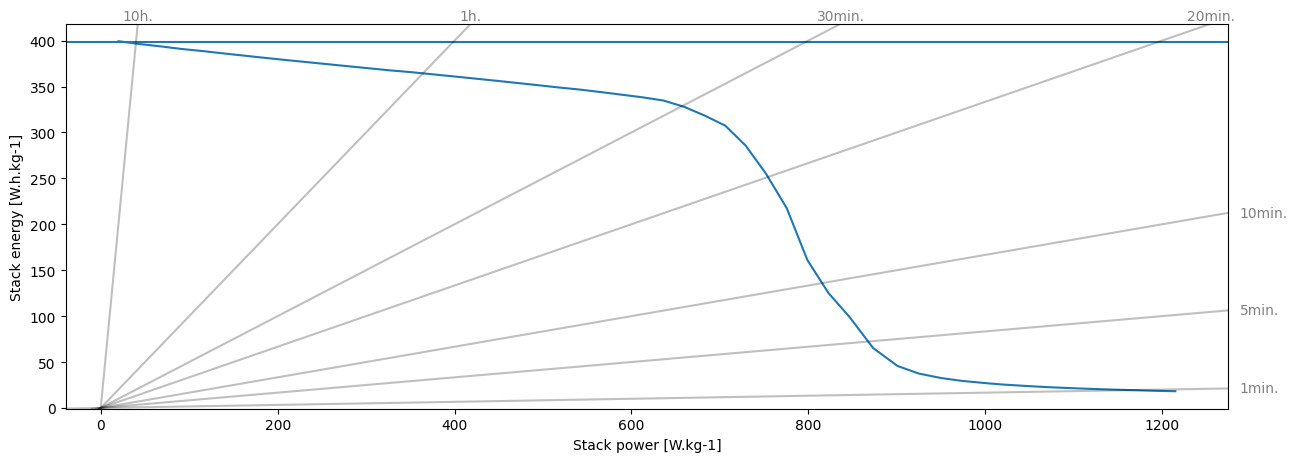

In [3]:
c_rates = np.linspace(0.05, 3, 51) # C-rates to evaluate
pybamm_tea.ragone_plot([tea_class], C_rates=c_rates)

### Constant power vs. constant current

It is good to see that the energy at low C-rates is not that far from the theoretical estimation, plotted as the horizontal line. The diagonal isolines (energy/power) indicate how long it would be possible to discharge the cell at the respective power. By default the energy - power pairs are calculated from constant power experiments starting at 100% SoC down to the lower voltage cut-off. Thereby the current is not constant and the C-rate input is just close to the actual average C-rate. However, we can also calculate energy and power from a constant current discharge - as from a rate capability test - therefore we need to set "mode" to "CC", as below.

At t = 86.1228 and h = 5.043e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 106.443 and h = 6.33903e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 108.208 and h = 4.37293e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 51.3003 and h = 3.26049e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 93.2035 and h = 6.48699e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 70.0297 and h = 1.99746e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 32.8495 and h = 7.42711e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 32.8575 and h = 7.73225e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 111.772 and h = 1.15351e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 54.9512 and h = 2.35073e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At

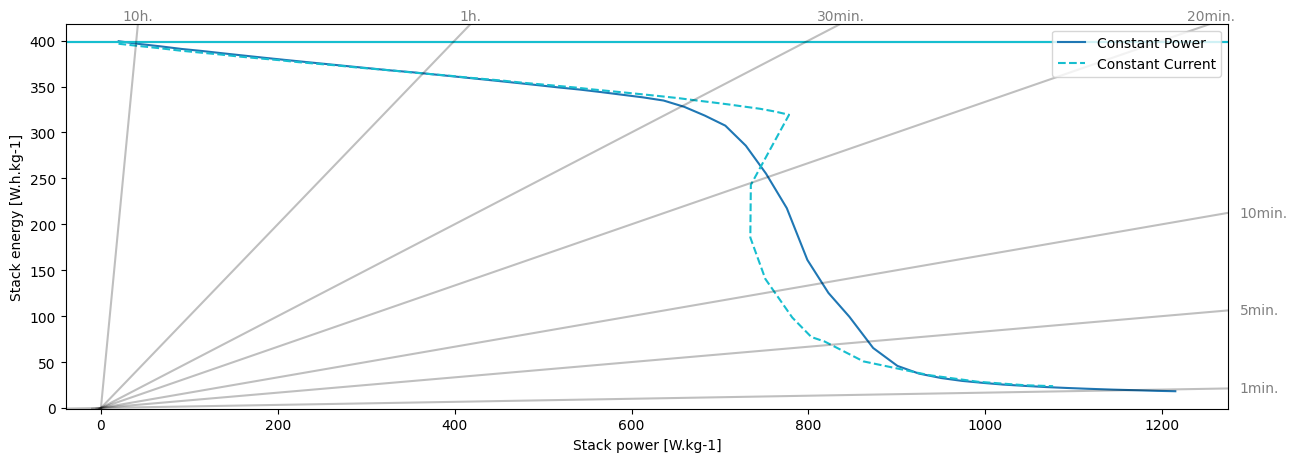

In [4]:
pybamm_tea.ragone_plot([tea_class, tea_class], label_list = ["Constant Power", "Constant Current"], C_rates=c_rates, modes_list=["CP", "CC"])

### Capacities and potentials

It is interesting to see the knee from the constant current discharge, which shows multiple values for the same power. This behaviour results from a minimum in average potential and depends on the lower voltage cut-off. We can see it better by setting _plot_capacities_and_potentials_ to _True_ and by adjusting the C-rates array for that region.

At t = 103.828 and h = 4.64519e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 102.395 and h = 3.6951e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 104.404 and h = 4.55905e-20, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 47.9575 and h = 3.54326e-24, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 88.4043 and h = 1.05135e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 72.8619 and h = 4.15539e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 43.2536 and h = 1.58432e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 43.2536 and h = 1.53423e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 107.022 and h = 2.3857e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 49.3254 and h = 4.07387e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At

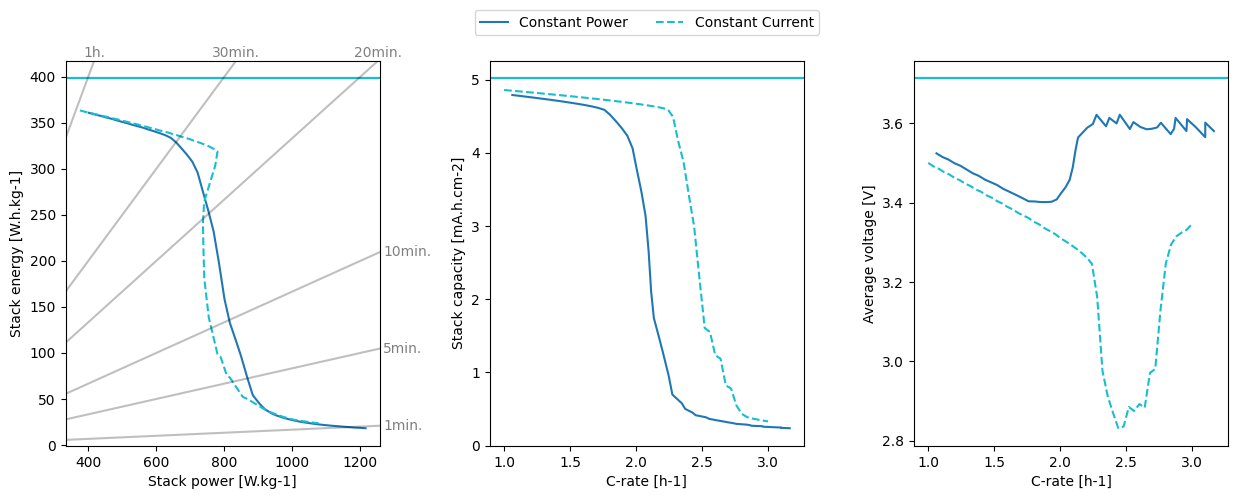

In [5]:
c_rates_zoom = np.linspace(1, 3, 51)  # C-rates to evaluate
pybamm_tea.ragone_plot([tea_class, tea_class], label_list = ["Constant Power", "Constant Current"], C_rates=c_rates_zoom, modes_list=["CP", "CC"], plot_capacities_and_potentials=True)

### Models and Solvers

By default the SPMe model with default settings is used for the simulations and solved with the CasadiSolver() and dt_max=120. One can also input other models, e.g. the DFN model, and model options, e.g. "thermal". When changing the model it might be necessary to change the solver as well. Both models and solvers can be inputted as lists.

At t = 106.194 and h = 6.64211e-21, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 49.5136 and h = 1.7447e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 46.1179 and h = 1.56195e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 46.1179 and h = 1.05822e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 80.4025 and h = 1.26035e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 25.183 and h = 9.15718e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 38.2955 and h = 7.24457e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 38.2964 and h = 1.8039e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 112.986 and h = 9.48044e-20, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 92.8975 and h = 9.48555e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At 

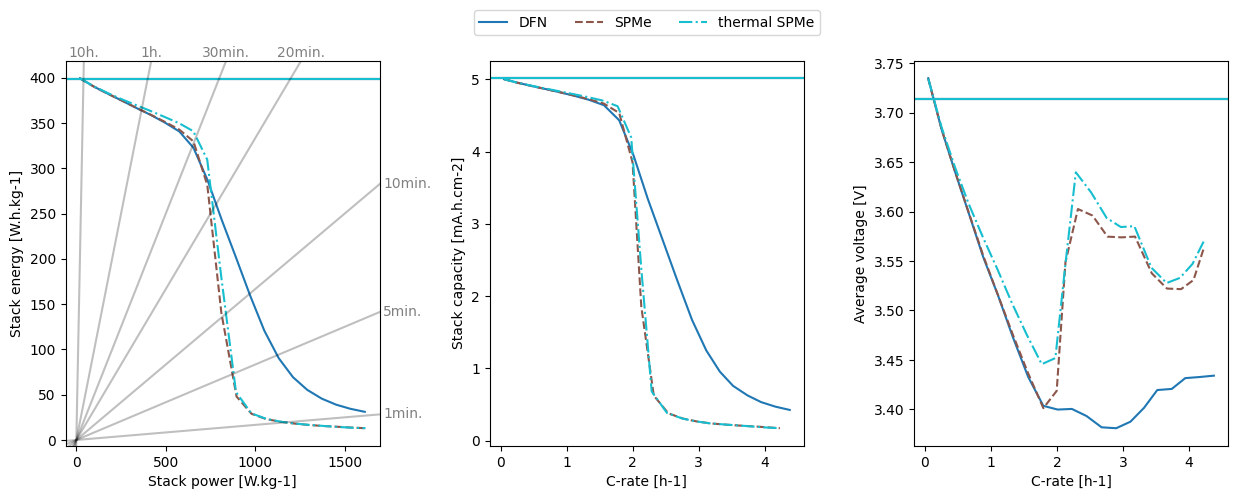

In [6]:
# set up the models and solvers
model_list = [pybamm.lithium_ion.DFN(), pybamm.lithium_ion.SPMe(), pybamm.lithium_ion.SPMe(options = {"thermal": "lumped"})]
solver_list = [pybamm.CasadiSolver(mode="fast with events"), pybamm.CasadiSolver(dt_max=120), pybamm.CasadiSolver(dt_max=120)]

c_rates = np.linspace(0.05, 4, 21)  # C-rates to evaluate

# plot the Ragone plot
pybamm_tea.ragone_plot([tea_class, tea_class, tea_class], label_list = ["DFN", "SPMe", "thermal SPMe"], C_rates=c_rates, plot_capacities_and_potentials=True, model_list=model_list, solver_list=solver_list)

### Reaction or transport limitations?

The current at which the drop occurs depends strongly on parameters considered within the TEA, such as thicknesses, but also on parameters that do not influence the energy in theory.

Impactful parameters for rate capability can be particle sizes and tortuosities. The particle radius influences the active surface area for the exchange current density and the diffusion within the particles, by reducing the particle size of each electrode we can see possible reaction limitations caused by one electrode. The tortuosity is typically described in dependence of the porosity by the Bruggeman relation, by increasing the Bruggeman coefficient we can see how transport limitations show up. Setting higher tortuosity values - directly or in form of Bruggeman coefficients - can also somewhat compensate porosity overestimations for the theoretical energy calculations.

At t = 103.828 and h = 4.64518e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 72.8619 and h = 1.63655e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 101.491 and h = 8.23131e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 45.2394 and h = 3.16756e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 20.2372 and h = 1.24016e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 54.0618 and h = 2.15551e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 54.0621 and h = 4.40081e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 24.6533 and h = 3.73297e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 101.395 and h = 1.79767e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 45.8395 and h = 9.75009e-15, the corrector convergence failed repeatedly or with |h| = hmin.


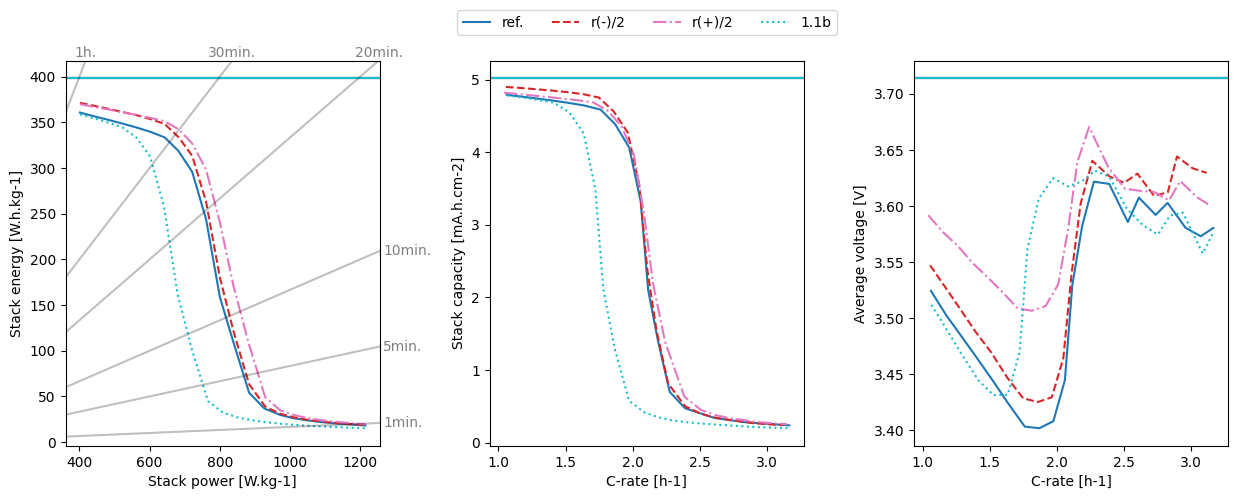

In [7]:
input_ne_r_half = {"Negative particle radius [m]": tea_class.parameter_values["Negative particle radius [m]"] / 2}
input_pe_r_half = {"Positive particle radius [m]": tea_class.parameter_values["Positive particle radius [m]"] / 2}
input_b_double = {"Positive electrode Bruggeman coefficient (electrolyte)": tea_class.parameter_values["Positive electrode Bruggeman coefficient (electrolyte)"] * 1.1,
                  "Negative electrode Bruggeman coefficient (electrolyte)": tea_class.parameter_values["Negative electrode Bruggeman coefficient (electrolyte)"] * 1.1}

tea_class_ne_r_half = pybamm_tea.TEA(base, {**input, **input_ne_r_half})
tea_class_pe_r_half = pybamm_tea.TEA(base, {**input, **input_pe_r_half})
tea_class_b_double = pybamm_tea.TEA(base, {**input, **input_b_double})

c_rates = np.linspace(1, 3, 21)  # C-rates to evaluate
pybamm_tea.ragone_plot([tea_class, tea_class_ne_r_half, tea_class_pe_r_half, tea_class_b_double], label_list = ["ref.", "r(-)/2", "r(+)/2", "1.1b"], C_rates=c_rates, plot_capacities_and_potentials=True)

### Maximal thicknesses

In the above plot, we can see that the tortuosity increase has the largest impact on the rate capability and that the positive particle size is more influencial than the negative. Besides tortuosity, rate capability is very sensitive for thicknesses. A great use case of the package is to estimate upper bounds for thicknesses to meet certain rate requirements.

To do so we fix the theoretical N/P ratio and create the Ragone plot with TEA classes of different electrode thicknesses and porosities.

At t = 91.8151 and h = 2.45857e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 65.7013 and h = 5.42804e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 69.5917 and h = 1.00146e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 113.342 and h = 1.38048e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 115.784 and h = 2.14998e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 56.5288 and h = 5.86722e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 26.8998 and h = 1.02126e-13, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 72.4791 and h = 7.04303e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 110.279 and h = 1.57796e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 92.6494 and h = 5.80782e-15, the corrector convergence failed repeatedly or with |h| = hmin.


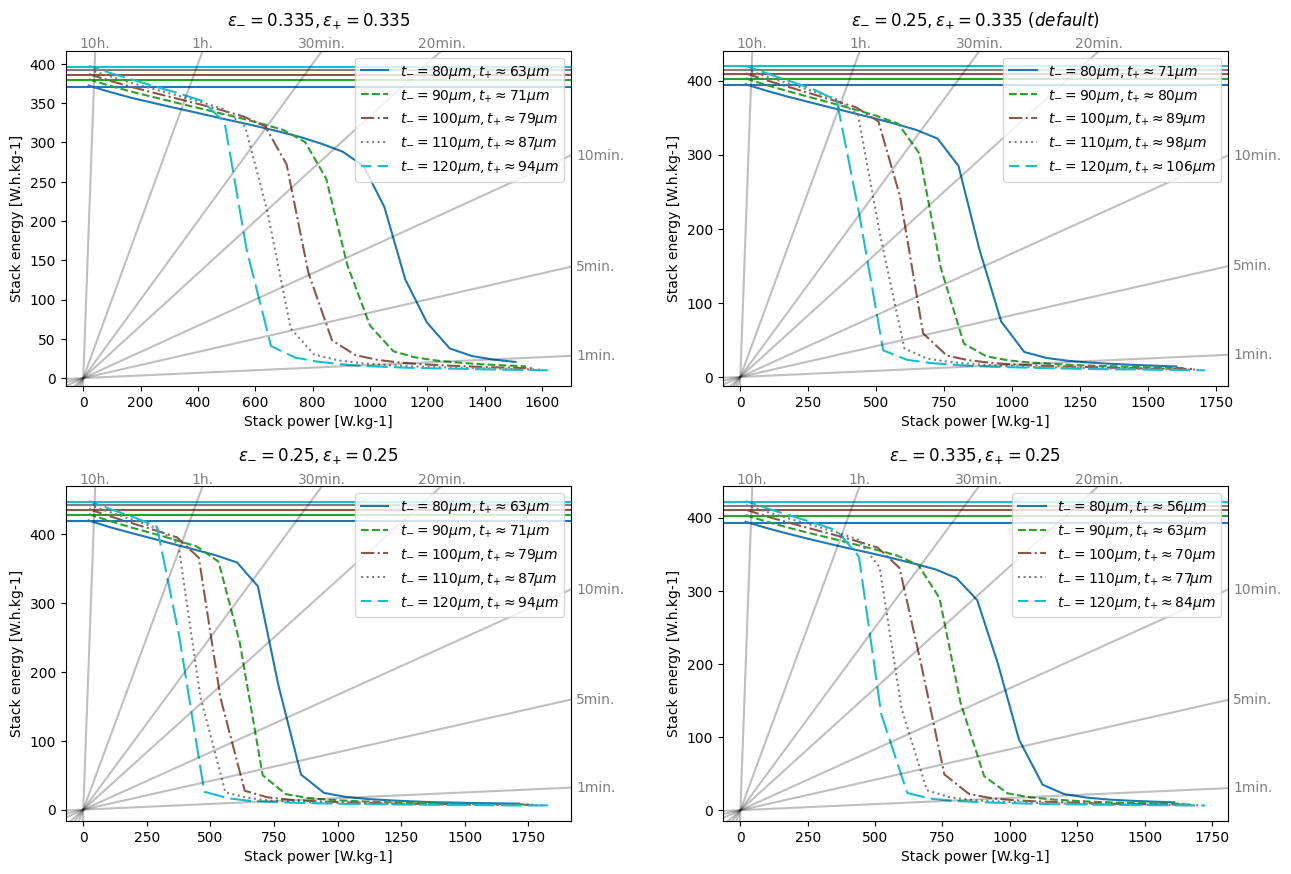

In [8]:
# set up the the negative electrode thicknesses (which might be larger).
theoretical_n_p_ratio = {"Theoretical n/p ratio": tea_class.stack_energy.get("Theoretical n/p ratio"),
                         "Positive electrode thickness [m]": None}
input_80 = {"Negative electrode thickness [m]": 80e-6}
input_90 = {"Negative electrode thickness [m]": 90e-6}
input_100 = {"Negative electrode thickness [m]": 100e-6}
input_110 = {"Negative electrode thickness [m]": 110e-6}
input_120 = {"Negative electrode thickness [m]": 120e-6}

input_ne_335 = {"Negative electrode porosity": 0.335,
               "Negative electrode active material volume fraction": 0.665}
input_pe_25 = {"Positive electrode porosity": 0.25,
               "Positive electrode active material volume fraction": 0.75}

# create the TEA objects
# reference 0.25 & 0.335
tea_class_80_ref = pybamm_tea.TEA(base, {**input, **input_80, **theoretical_n_p_ratio})
tea_class_90_ref = pybamm_tea.TEA(base, {**input, **input_90, **theoretical_n_p_ratio})
tea_class_100_ref = pybamm_tea.TEA(base, {**input, **input_100, **theoretical_n_p_ratio})
tea_class_110_ref = pybamm_tea.TEA(base, {**input, **input_110, **theoretical_n_p_ratio})
tea_class_120_ref = pybamm_tea.TEA(base, {**input, **input_120, **theoretical_n_p_ratio})
ref_list = [tea_class_80_ref, tea_class_90_ref, tea_class_100_ref, tea_class_110_ref, tea_class_120_ref]
# 0.335 & 0.335
tea_class_80_ne = pybamm_tea.TEA(base, {**input, **input_80, **input_ne_335, **theoretical_n_p_ratio})
tea_class_90_ne = pybamm_tea.TEA(base, {**input, **input_90, **input_ne_335, **theoretical_n_p_ratio})
tea_class_100_ne = pybamm_tea.TEA(base, {**input, **input_100, **input_ne_335, **theoretical_n_p_ratio})
tea_class_110_ne = pybamm_tea.TEA(base, {**input, **input_110, **input_ne_335, **theoretical_n_p_ratio})
tea_class_120_ne = pybamm_tea.TEA(base, {**input, **input_120, **input_ne_335, **theoretical_n_p_ratio})
ne_list_335_335 = [tea_class_80_ne, tea_class_90_ne, tea_class_100_ne, tea_class_110_ne, tea_class_120_ne]
# 0.335 & 0.25
tea_class_80_ne_pe = pybamm_tea.TEA(base, {**input, **input_80, **input_ne_335, **input_pe_25, **theoretical_n_p_ratio})
tea_class_90_ne_pe = pybamm_tea.TEA(base, {**input, **input_90, **input_ne_335, **input_pe_25, **theoretical_n_p_ratio})
tea_class_100_ne_pe = pybamm_tea.TEA(base, {**input, **input_100, **input_ne_335, **input_pe_25, **theoretical_n_p_ratio})
tea_class_110_ne_pe = pybamm_tea.TEA(base, {**input, **input_110, **input_ne_335, **input_pe_25, **theoretical_n_p_ratio})
tea_class_120_ne_pe = pybamm_tea.TEA(base, {**input, **input_120, **input_ne_335, **input_pe_25, **theoretical_n_p_ratio})
ne_pe_335_25_list = [tea_class_80_ne_pe, tea_class_90_ne_pe, tea_class_100_ne_pe, tea_class_110_ne_pe, tea_class_120_ne_pe]
# 0.25 & 0.25
tea_class_80_pe_33 = pybamm_tea.TEA(base, {**input, **input_80, **input_pe_25, **theoretical_n_p_ratio})
tea_class_90_pe_33 = pybamm_tea.TEA(base, {**input, **input_90, **input_pe_25, **theoretical_n_p_ratio})
tea_class_100_pe_33 = pybamm_tea.TEA(base, {**input, **input_100, **input_pe_25, **theoretical_n_p_ratio})
tea_class_110_pe_33 = pybamm_tea.TEA(base, {**input, **input_110, **input_pe_25, **theoretical_n_p_ratio})
tea_class_120_pe_33 = pybamm_tea.TEA(base, {**input, **input_120, **input_pe_25, **theoretical_n_p_ratio})
pe_25_25_list = [tea_class_80_pe_33, tea_class_90_pe_33, tea_class_100_pe_33, tea_class_110_pe_33, tea_class_120_pe_33]

# create the labels
label_ref_list = [
    f"$t_{{-}} = {int(np.round(tea_class__.parameter_values.get('Negative electrode thickness [m]') * 1e6, 0))} µm, "
    f"t_{{+}} \\approx {int(np.round(tea_class__.parameter_values.get('Positive electrode thickness [m]') * 1e6, 0))} µm$"
    for tea_class__ in ref_list
]
label_ne_335_335_list = [
    f"$t_{{-}} = {int(np.round(tea_class__.parameter_values.get('Negative electrode thickness [m]') * 1e6, 0))} µm, "
    f"t_{{+}} \\approx {int(np.round(tea_class__.parameter_values.get('Positive electrode thickness [m]') * 1e6, 0))} µm$"
    for tea_class__ in ne_list_335_335
]
label_pe_25_25_list = [
    f"$t_{{-}} = {int(np.round(tea_class__.parameter_values.get('Negative electrode thickness [m]') * 1e6, 0))} µm, "
    f"t_{{+}} \\approx {int(np.round(tea_class__.parameter_values.get('Positive electrode thickness [m]') * 1e6, 0))} µm$"
    for tea_class__ in pe_25_25_list
]
label_ne_pe_335_25_list = [
    f"$t_{{-}} = {int(np.round(tea_class__.parameter_values.get('Negative electrode thickness [m]') * 1e6, 0))} µm, "
    f"t_{{+}} \\approx {int(np.round(tea_class__.parameter_values.get('Positive electrode thickness [m]') * 1e6, 0))} µm$"
    for tea_class__ in ne_pe_335_25_list
]

# C-rates to evaluate
c_rates = np.linspace(0.05, 4, 21)

# create the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
axs[0,0].set_title("$\\epsilon_{-} = 0.335, \\epsilon_{+} = 0.335$", y=1.05)
axs[1,0].set_title("$\\epsilon_{-} = 0.25, \\epsilon_{+} = 0.25$", y=1.05)
axs[0,1].set_title("$\\epsilon_{-} = 0.25, \\epsilon_{+} = 0.335 \\ (default)$", y=1.05)
axs[1,1].set_title("$\\epsilon_{-} = 0.335, \\epsilon_{+} = 0.25$", y=1.05)
pybamm_tea.ragone_plot(tea_class_list=ref_list, label_list = label_ref_list, C_rates=c_rates, axes=axs[0,1])
pybamm_tea.ragone_plot(tea_class_list=ne_list_335_335, label_list = label_ne_335_335_list, C_rates=c_rates, axes=axs[0,0])
pybamm_tea.ragone_plot(tea_class_list=ne_pe_335_25_list, label_list = label_ne_pe_335_25_list, C_rates=c_rates, axes=axs[1,1])
pybamm_tea.ragone_plot(tea_class_list=pe_25_25_list, label_list = label_pe_25_25_list, C_rates=c_rates, axes=axs[1,0])

### Degradation

As we can set losses of lithium inventory and of active materials for the theoretical calculations, we can also quickly estimate their impact on rate capability with the Ragone plots. Besides that we could pass the _tea_class.parameter_values_ to an actual degradation model to estimate losses first hand.

At t = 103.828 and h = 4.64518e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 72.8619 and h = 4.58545e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 101.491 and h = 8.70471e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 45.2394 and h = 1.8434e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 20.2373 and h = 2.40484e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 54.0619 and h = 8.73133e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 54.0619 and h = 1.81991e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 24.6533 and h = 4.30004e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 101.395 and h = 2.31424e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 45.8394 and h = 8.51836e-15, the corrector convergence failed repeatedly or with |h| = hmin.
A

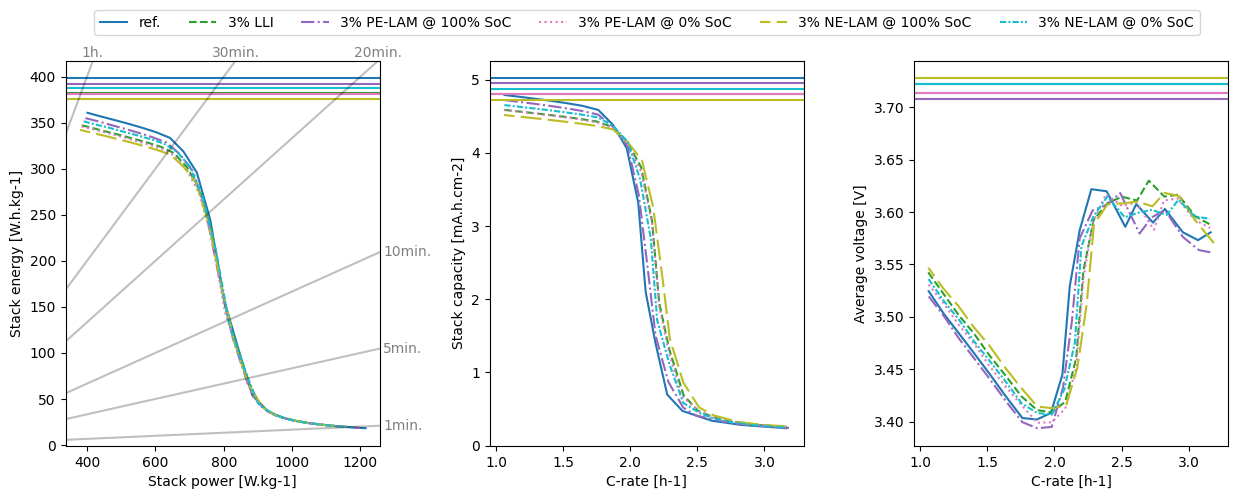

In [9]:
input_lli = {"Loss of lithium inventory [%]": 3}
input_pe_lam_100 = {"Loss of positive electrode active material [%]": 3,
                    "Positive electrode stoichiometry at LAM": tea_class.stack_energy.get("Positive electrode stoichiometry at 100% SoC")}
input_pe_lam_0 = {"Loss of positive electrode active material [%]": 3,
                  "Positive electrode stoichiometry at LAM": tea_class.stack_energy.get("Positive electrode stoichiometry at 0% SoC")}
input_ne_lam_100 = {"Loss of negative electrode active material [%]": 3,
                    "Negative electrode stoichiometry at LAM": tea_class.stack_energy.get("Negative electrode stoichiometry at 100% SoC")}
input_ne_lam_0 = {"Loss of negative electrode active material [%]": 3,
                  "Negative electrode stoichiometry at LAM": tea_class.stack_energy.get("Negative electrode stoichiometry at 0% SoC")}

tea_class_lli = pybamm_tea.TEA(base, {**input, **input_lli})
tea_class_pe_lam_100 = pybamm_tea.TEA(base, {**input, **input_pe_lam_100})
tea_class_pe_lam_0 = pybamm_tea.TEA(base, {**input, **input_pe_lam_0})
tea_class_ne_lam_100 = pybamm_tea.TEA(base, {**input, **input_ne_lam_100})
tea_class_ne_lam_0 = pybamm_tea.TEA(base, {**input, **input_ne_lam_0})

tea_class_list_losses = [tea_class, tea_class_lli, tea_class_pe_lam_100, tea_class_pe_lam_0, tea_class_ne_lam_100, tea_class_ne_lam_0]
label_list_losses = ["ref.", "3% LLI", "3% PE-LAM @ 100% SoC", "3% PE-LAM @ 0% SoC", "3% NE-LAM @ 100% SoC", "3% NE-LAM @ 0% SoC"]

c_rates_zoom = np.linspace(1, 3, 21)  # C-rates to evaluate
pybamm_tea.ragone_plot(tea_class_list=tea_class_list_losses, label_list = label_list_losses, C_rates=c_rates_zoom, plot_capacities_and_potentials=True)